In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
m = session.query(measurement).order_by(measurement.prcp.desc()).all()
m[0].__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1332a27cf10>,
 'id': 6701,
 'prcp': 11.53,
 'tobs': 76.0,
 'station': 'USC00514830',
 'date': '2014-07-20'}

In [10]:
# Find the most recent date in the data set.
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23',)

In [19]:
year_ago = (dt.datetime.strptime(last_date[0], "%Y-%m-%d") - dt.timedelta(weeks=52, days=1)).date()
year_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).order_by(measurement.date).all()
df = pd.DataFrame(year_scores, columns = ["Date", "precipitation"])
#df.set_index('Date', inplace=True)
df2 = df.groupby("Date").sum()
display(df)

,Date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [13]:
df2.index

Index(['2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26', '2016-08-27',
       '2016-08-28', '2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01',
       ...
       '2017-08-14', '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
       '2017-08-19', '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23'],
      dtype='object', name='Date', length=366)

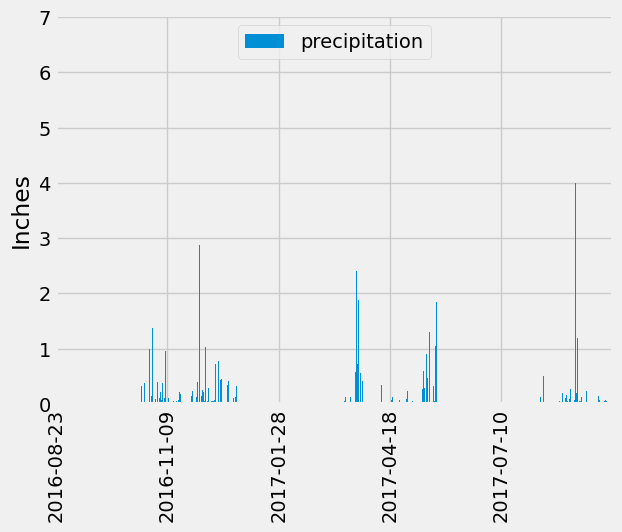

In [18]:
df.plot.bar()
plt.ylabel("Inches")
labels = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
x = np.arange(len(df), step=len(df)/5)
plt.xticks(x, labels, rotation='vertical')
plt.show()

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()